# Processor Testing

This is for testing and re-testing the processor. It should be kept to a very small number of cells; essentially, one for set up, one to run the processor, and _maybe_ one to do some smart data caching to avoid excess processing during testing

In [1]:
import logging
import sys
from matplotlib import pyplot as plt

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.WARNING, stream=sys.stdout)

In [2]:
BLOCK_PATH = "/Users/smorgan/Documents/tdttmp/Block-1"
# BLOCK_PATH = "/Volumes/SM Research/Research Data/Simeon Morgan/111_140/2009-07-19 Auditory continuous 10s acclimatisation/2009-07-19 111_140/Block-1"

# Data caches for when running the session processor multiple times
block_data = None
trial_windows = None

In [9]:
from lib import processors, structures
from importlib import reload
structures = reload(structures)
processors = reload(processors)

session_processor = processors.SessionProcessor(block_path=BLOCK_PATH)

if block_data:
    session_processor._block_data = block_data
if trial_windows:
    session_processor._trial_windows = trial_windows
    
session_results = session_processor.extract_spikes_from_trial(from_trial_offset=-8.1, to_trial_offset=8.1)

block_data = session_processor._block_data
trial_windows = session_processor._trial_windows


AttributeError: 'IncludedAcousticTrial' object has no attribute 'base_frequency'

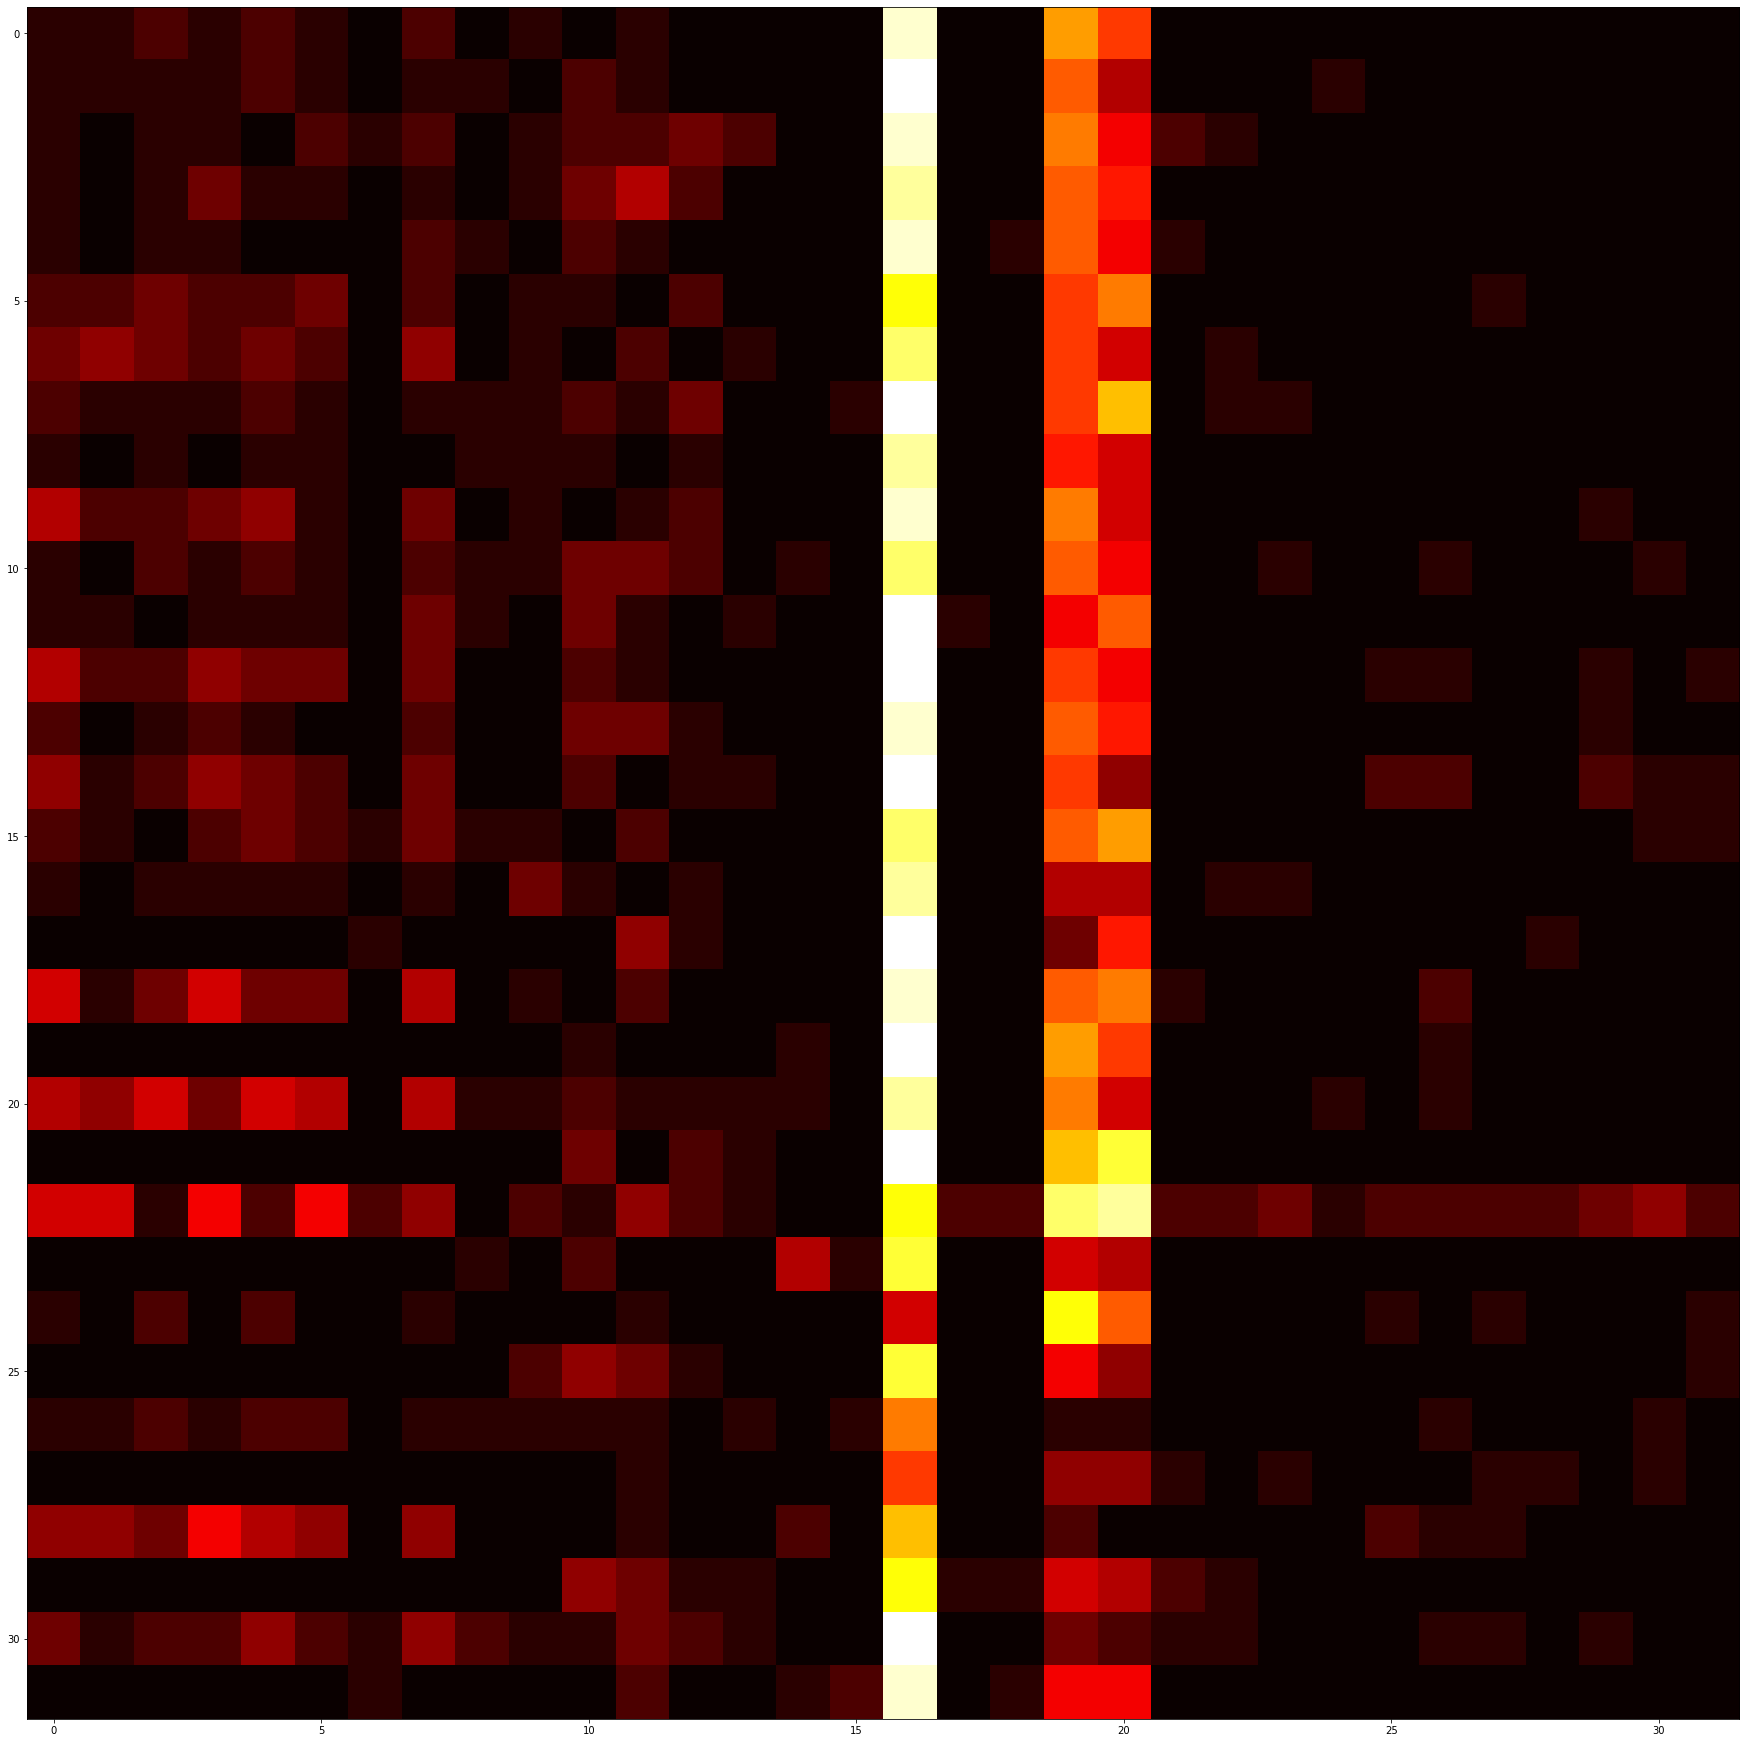

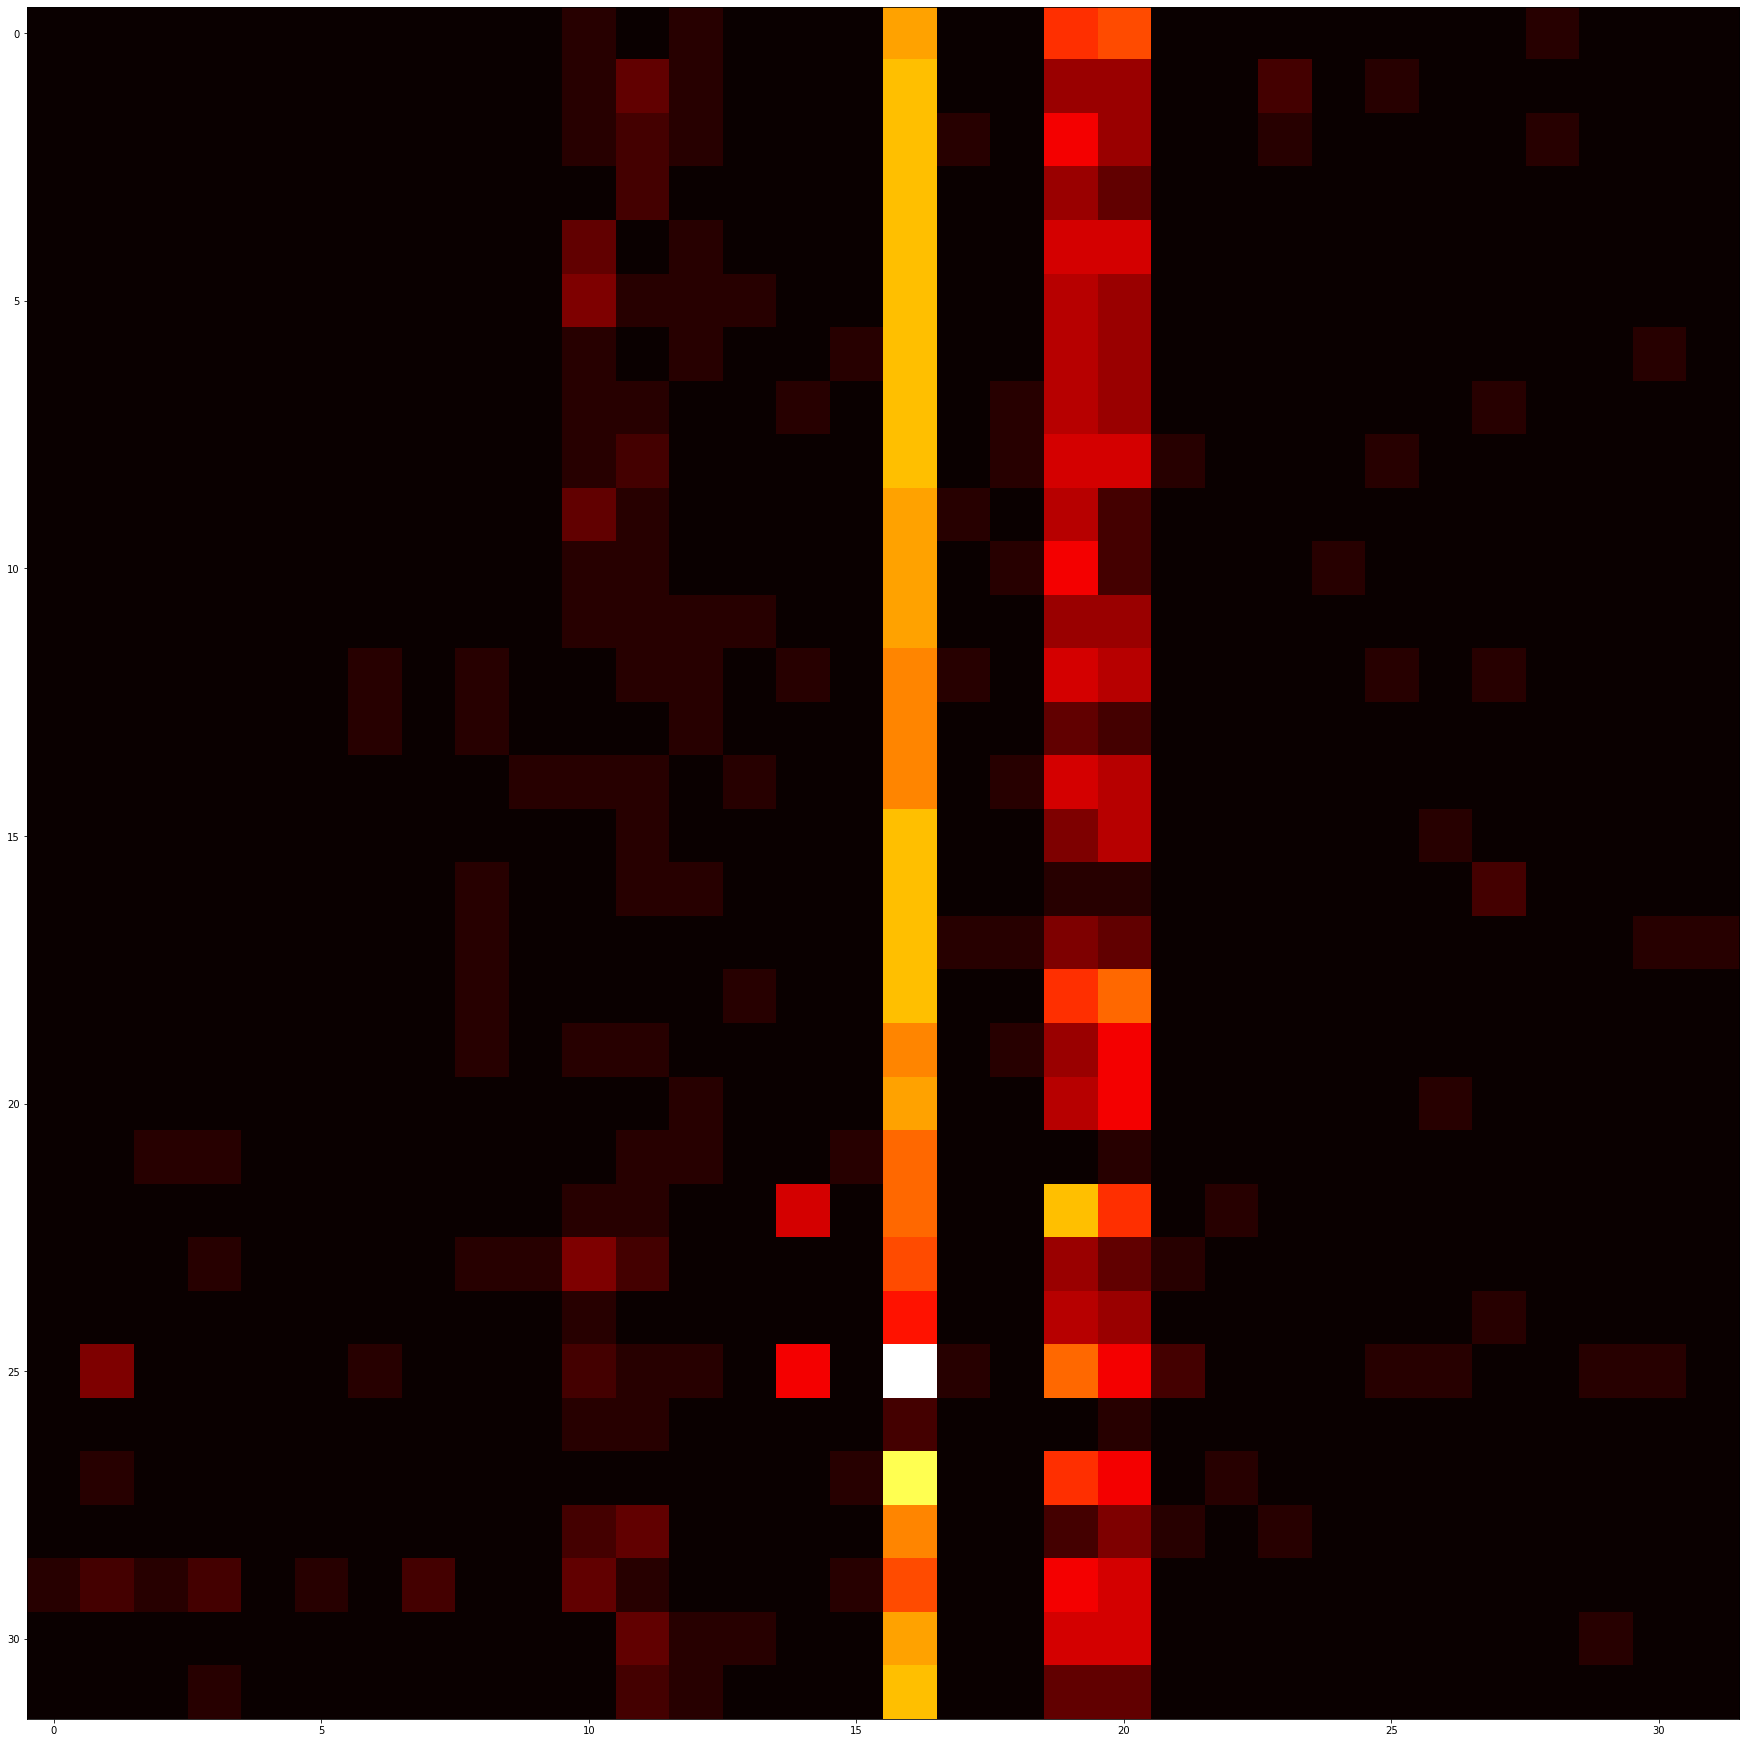

In [4]:
# session_results.trials[0].tones
# np.set_printoptions(threshold=sys.maxsize)
# plt.rcParams["figure.figsize"] = [100 / 2.54, 80 / 2.54]
# plt.imshow(session_results.trials[0].in_tone_spike_counts, cmap="hot", interpolation="nearest")
# plt.show()

# plt.rcParams["figure.figsize"] = [100 / 2.54, 80 / 2.54]
# plt.imshow(session_results.trials[0].out_tone_spike_counts, cmap="hot", interpolation="nearest")
# plt.show()
